In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from collections import deque

In [ ]:
df=pd.read_csv("/content/wheat seeds.csv")
df

,Area,Perimeter_,Compactness,Length_Of_Kernel,Width_Of_Kernel,Asymmetry_Coefficient_,Length_Of_Kernel_Groove,Wheat_Type
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1
...,...,...,...,...,...,...,...,...
205,12.19,13.20,0.8783,5.137,2.981,3.631,4.870,3
206,11.23,12.88,0.8511,5.140,2.795,4.325,5.003,3
207,13.20,13.66,0.8883,5.236,3.232,8.315,5.056,3
208,11.84,13.21,0.8521,5.175,2.836,3.598,5.044,3


In [ ]:
df.columns

Index(['Area', 'Perimeter_', 'Compactness', 'Length_Of_Kernel',
       'Width_Of_Kernel', 'Asymmetry_Coefficient_', 'Length_Of_Kernel_Groove',
       'Wheat_Type'],
      dtype='object')

In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Area                     210 non-null    float64
 1   Perimeter_               210 non-null    float64
 2   Compactness              210 non-null    float64
 3   Length_Of_Kernel         210 non-null    float64
 4   Width_Of_Kernel          210 non-null    float64
 5   Asymmetry_Coefficient_   210 non-null    float64
 6   Length_Of_Kernel_Groove  210 non-null    float64
 7   Wheat_Type               210 non-null    int64  
dtypes: float64(7), int64(1)
memory usage: 13.3 KB


In [ ]:
df.isna().sum()

,0
Area,0
Perimeter_,0
Compactness,0
Length_Of_Kernel,0
Width_Of_Kernel,0
Asymmetry_Coefficient_,0
Length_Of_Kernel_Groove,0
Wheat_Type,0


In [ ]:
#choosing features : Length of kernel, Width of kernel, Asymmetry coefficient, Length of kernel groove
features=df[["Length_Of_Kernel","Width_Of_Kernel","Asymmetry_Coefficient_","Length_Of_Kernel_Groove"]]

In [ ]:
#standardize features
scaler=StandardScaler()
scaled_df=scaler.fit_transform(features)

In [ ]:
#Define clique clustering
def clique_clustering(data,min_points,grid_size):
  n,d=data.shape


  #normalize data to [0,1]
  data_min=data.min(axis=0)
  data_max=data.max(axis=0)
  norm_data=(data-data_min)/(data_max-data_min+1e-9)

  #map data points to grid cells
  cell_indices=(norm_data/grid_size).astype(int)
  cell_dict={}
  for idx, cell in enumerate(cell_indices):
    key=tuple(cell)
    if key not in cell_dict:
      cell_dict[key] = []
    cell_dict[key].append(idx)


  #identify dense cells
  dense_cells={k: v for k,v in cell_dict.items() if len(v)>=min_points}


  #assign cluster labels using connected dense regions
  visited=set()
  cluster_labels=-1 * np.ones(n,dtype=int)
  cluster_id=0

  def get_neighbors(cell):
    neighbors=[]
    for offset in np.ndindex(*(3,)*d):
      neighbor=tuple(cell[i]+offset[i]-1 for i in range(d))
      if neighbor != cell and neighbor in dense_cells:
        neighbors.append(neighbor)
    return neighbors

  for cell in dense_cells:
    if cell not in visited:
      visited.add(cell)
      queue=deque([cell])
      while queue:
        current_cell=queue.popleft()
        for point_idx in dense_cells[current_cell]:
          cluster_labels[point_idx] = cluster_id
        for neighbor in get_neighbors(current_cell):
          if neighbor not in visited:
            visited.add(neighbor)
            queue.append(neighbor)
      cluster_id += 1

  return cluster_labels

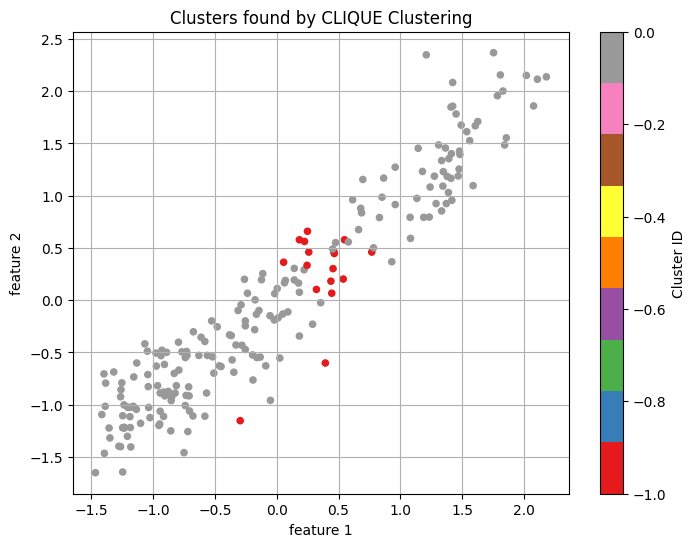

In [ ]:
#call the function
labels=clique_clustering(scaled_df,min_points=10,grid_size=0.5)
#plot clustered data
plt.figure(figsize=(8,6))
plt.scatter(scaled_df[:,0],scaled_df[:,1],c=labels,cmap='Set1',s=20)
plt.title("Clusters found by CLIQUE Clustering")
plt.xlabel("feature 1")
plt.ylabel("feature 2")
plt.colorbar(label="Cluster ID")
plt.grid(True)
plt.show()
